In [1]:
import tensorflow as tf
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
import random


In [2]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1, 2)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 6)              18        
                                                                 
 dense_1 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_2 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_3 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_4 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_5 (Dense)             (None, 1, 1)              7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (7

In [12]:

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
# Print the dataset
dataset = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "y":y})
dataset

,X0,X1,y
0,-0.051470,0.444199,1
1,1.032017,-0.419741,1
2,0.867892,-0.254827,1
3,0.288851,-0.448669,1
4,-0.833439,0.535057,0
...,...,...,...
995,0.810647,0.527220,0
996,-0.162279,0.912738,0
997,1.684259,-0.348223,1
998,-0.967201,0.263672,0


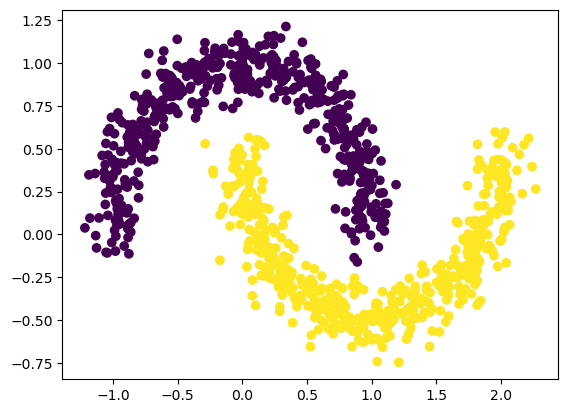

In [14]:
# Visualize our dataset

plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [18]:
# Create a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 0.6819 - accuracy: 0.5550 - val_loss: 0.6720 - val_accuracy: 0.7950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.8025 - val_loss: 0.6497 - val_accuracy: 0.8400
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6328 - accuracy: 0.8400 - val_loss: 0.6240 - val_accuracy: 0.8600
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.8612 - val_loss: 0.6015 - val_accuracy: 0.8550
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.8612 - val_loss: 0.5790 - val_accuracy: 0.8550
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8650 - val_loss: 0.5576 - val_accuracy: 0.8550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.8662 - val_loss: 0.5373 - val_accuracy: 0.8500
Epoch 8/100


In [22]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #make predictions
    y_pred = model.predict(x_in)
    
    #check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


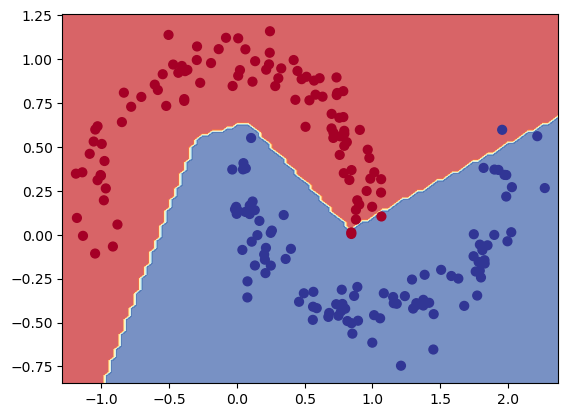

In [23]:
plot_decision_boundary(model_2, X_test, y_test)

## Train a model on the fashion MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
def visualize_random(train_data, train_labels):
    plt.figure(figsize=(7, 7))
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        index = random.choice(range(len(train_data)))
        plt.imshow(train_data[index], cmap=plt.cm.binary)
        plt.title(class_name[train_labels[index]])
        plt.axis(False)

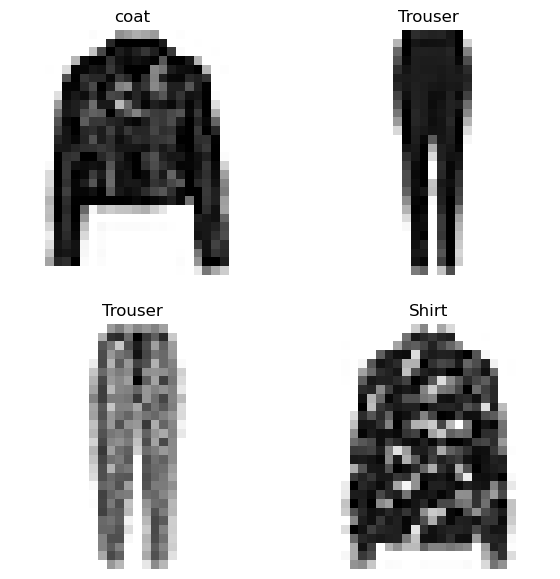

In [5]:
# Visulize random images

visualize_random(X_train, y_train)

In [6]:
def normalize_images(data):
    return tf.cast(data, tf.float32)/255.

In [7]:
X_train_norm = normalize_images(X_train)
X_test_norm = normalize_images(X_test)
X_train_norm.shape, X_train_norm.dtype, X_test_norm.shape, X_test_norm.dtype 

(TensorShape([60000, 28, 28]),
 tf.float32,
 TensorShape([10000, 28, 28]),
 tf.float32)

In [8]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_3.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9492 - accuracy: 0.6553 - val_loss: 0.6870 - val_accuracy: 0.7597
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6407 - accuracy: 0.7781 - val_loss: 0.6573 - val_accuracy: 0.7685
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5798 - accuracy: 0.8015 - val_loss: 0.6104 - val_accuracy: 0.7864
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5446 - accuracy: 0.8131 - val_loss: 0.5650 - val_accuracy: 0.8036
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5252 - accuracy: 0.8178 - val_loss: 0.5588 - val_accuracy: 0.8046
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5087 - accuracy: 0.8231 - val_loss: 0.5404 - val_accuracy: 0.8093
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4986 - accuracy: 0.8272 - val_loss: 0.5453 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_4.compile(loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])
model_4.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8854 - accuracy: 0.6746 - val_loss: 0.5895 - val_accuracy: 0.7898
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5176 - accuracy: 0.8180 - val_loss: 0.5080 - val_accuracy: 0.8211
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4534 - accuracy: 0.8386 - val_loss: 0.4752 - val_accuracy: 0.8308
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4201 - accuracy: 0.8516 - val_loss: 0.4631 - val_accuracy: 0.8359
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3985 - accuracy: 0.8554 - val_loss: 0.4495 - val_accuracy: 0.8430
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3836 - accuracy: 0.8611 - val_loss: 0.4567 - val_accuracy: 0.8376
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8638 - val_loss: 0.4442 - val_accuracy: